<a href="https://colab.research.google.com/github/SimraRafiq/Deep_Learning-assignment/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.7/dist-packages (2.4.1)


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [11]:
creditcard_data=pd.read_csv("creditcard.csv")
display(creditcard_data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15931,27369,-1.160116,-0.244177,0.744250,-0.192350,1.156356,-1.931383,0.409670,-0.364716,-0.516156,-0.259295,-0.334931,0.034301,0.180830,0.304219,0.617653,-0.165891,-0.164087,-0.579506,0.310690,-0.209708,-0.021714,0.012447,-0.360625,0.514926,0.064194,1.026317,-0.030845,-0.083609,52.90,0.0
15932,27369,-3.058318,3.099206,-4.932555,1.924138,-1.576032,-2.135383,-0.830098,2.228617,-0.312343,-1.059102,-0.093860,0.140422,-0.174732,-1.876136,1.068378,1.614986,3.794014,1.704158,-0.606898,-0.049105,-0.111526,-0.485223,-0.003945,0.049422,-0.173962,-0.379260,0.171872,-0.236166,99.99,0.0
15933,27369,-0.661806,0.315385,2.011194,-0.438757,-0.554990,-0.668072,0.424651,0.079141,0.126057,-0.771700,-0.786274,-0.631577,-0.939768,0.056832,0.817539,0.872867,-0.790431,0.254751,-0.956994,-0.006012,0.148063,0.177511,0.134794,0.359931,-0.544428,0.181545,0.068546,0.153438,74.58,0.0
15934,27370,1.525348,-1.231442,0.420095,-1.551218,-1.376006,0.100758,-1.455755,0.134876,-1.319056,1.430341,-1.293415,-1.878013,-0.753629,-0.229368,1.312745,-0.130226,0.431252,0.309580,-0.472422,-0.431134,-0.108619,0.084883,-0.051758,-0.815038,0.331989,-0.015837,0.058942,0.011087,6.00,0.0


In [12]:
creditcard_data.shape

(15936, 31)

In [13]:
creditcard_data.ndim

2

In [14]:
creditcard_data["V2"]

0       -0.072781
1        0.266151
2       -1.340163
3       -0.185226
4        0.877737
           ...   
15931   -0.244177
15932    3.099206
15933    0.315385
15934   -1.231442
15935   -0.590076
Name: V2, Length: 15936, dtype: float64

In [15]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 22

In [16]:
pd.isnull(creditcard_data).sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [17]:
pd.isnull(creditcard_data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15931,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15932,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15933,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15934,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
creditcard_data=creditcard_data.fillna(creditcard_data.mean())
creditcard_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0.000000
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.000000
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0.000000
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.000000
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15931,27369,-1.160116,-0.244177,0.744250,-0.192350,1.156356,-1.931383,0.409670,-0.364716,-0.516156,-0.259295,-0.334931,0.034301,0.180830,0.304219,0.617653,-0.165891,-0.164087,-0.579506,0.310690,-0.209708,-0.021714,0.012447,-0.360625,0.514926,0.064194,1.026317,-0.030845,-0.083609,52.900000,0.000000
15932,27369,-3.058318,3.099206,-4.932555,1.924138,-1.576032,-2.135383,-0.830098,2.228617,-0.312343,-1.059102,-0.093860,0.140422,-0.174732,-1.876136,1.068378,1.614986,3.794014,1.704158,-0.606898,-0.049105,-0.111526,-0.485223,-0.003945,0.049422,-0.173962,-0.379260,0.171872,-0.236166,99.990000,0.000000
15933,27369,-0.661806,0.315385,2.011194,-0.438757,-0.554990,-0.668072,0.424651,0.079141,0.126057,-0.771700,-0.786274,-0.631577,-0.939768,0.056832,0.817539,0.872867,-0.790431,0.254751,-0.956994,-0.006012,0.148063,0.177511,0.134794,0.359931,-0.544428,0.181545,0.068546,0.153438,74.580000,0.000000
15934,27370,1.525348,-1.231442,0.420095,-1.551218,-1.376006,0.100758,-1.455755,0.134876,-1.319056,1.430341,-1.293415,-1.878013,-0.753629,-0.229368,1.312745,-0.130226,0.431252,0.309580,-0.472422,-0.431134,-0.108619,0.084883,-0.051758,-0.815038,0.331989,-0.015837,0.058942,0.011087,6.000000,0.000000


In [19]:
pd.isnull(creditcard_data).sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [20]:
x=creditcard_data.iloc[:,:30]
y=creditcard_data.iloc[:,30]


In [21]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels=train_test_split(x,y,test_size=0.30,random_state=69)

In [22]:
train_data=np.asarray(train_data)
test_data=np.asarray(test_data)

In [23]:
train_data[2]

array([ 2.66370000e+04,  1.22704029e+00, -7.58221648e-01, -5.11188269e-01,
       -1.06179148e+00,  2.17758146e-01,  1.04032648e+00, -5.42061315e-01,
        2.12908620e-01, -1.04037767e+00,  5.24934739e-01,  1.96214589e-01,
       -4.39180907e-01,  5.58851621e-01, -1.39629207e-01,  1.05614789e+00,
        7.35548631e-01,  5.44290569e-01, -1.79090854e+00,  7.77774413e-02,
        3.78697025e-01,  2.93418244e-01,  4.42448104e-01,  2.06187268e-02,
        3.69550295e+00,  5.82581541e-01, -2.66559495e-01, -2.66718500e-02,
        5.83187242e-02,  1.05750000e+02])

In [24]:
train_labels=np.asarray(train_labels)
test_labels=np.asarray(test_labels)

In [25]:
train_labels[18]

0.0

In [26]:
test_data[432]

array([ 1.33260000e+04, -1.97269847e+00, -1.66495630e+00,  2.44045745e+00,
       -1.47457290e+00,  1.07297634e+00,  1.30711359e+00, -1.69826838e+00,
        1.01342741e+00,  6.64163444e-01, -3.54884354e-01,  2.30689065e+00,
       -2.95570054e+00,  3.57936609e-01,  1.16326246e+00, -3.41309600e-01,
        3.59728276e-01,  1.75868428e+00, -1.78789377e+00, -1.39811100e+00,
        4.47182496e-01,  4.34294121e-01,  1.15437105e+00,  8.18882206e-02,
       -1.41537528e+00,  2.43963301e-01, -1.64574499e-02,  2.74786189e-01,
        1.21267775e-01,  5.75800000e+01])

In [27]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(30,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history=model.fit(train_data,train_labels,epochs=41,validation_split=0.2)

Epoch 1/41
279/279 [==============================] - 1s 3ms/step - loss: 2.3997 - accuracy: 0.9889 - val_loss: 0.2194 - val_accuracy: 0.9960
Epoch 2/41
279/279 [==============================] - 0s 1ms/step - loss: 1.1320 - accuracy: 0.9667 - val_loss: 0.2558 - val_accuracy: 0.9960
Epoch 3/41
279/279 [==============================] - 0s 1ms/step - loss: 0.8346 - accuracy: 0.9780 - val_loss: 0.2628 - val_accuracy: 0.9960
Epoch 4/41
279/279 [==============================] - 0s 1ms/step - loss: 0.8135 - accuracy: 0.9822 - val_loss: 0.2972 - val_accuracy: 0.9960
Epoch 5/41
279/279 [==============================] - 0s 1ms/step - loss: 0.6465 - accuracy: 0.9799 - val_loss: 0.4879 - val_accuracy: 0.9960
Epoch 6/41
279/279 [==============================] - 0s 1ms/step - loss: 0.5481 - accuracy: 0.9840 - val_loss: 0.0467 - val_accuracy: 0.9960
Epoch 7/41
279/279 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.9797 - val_loss: 0.3258 - val_accuracy: 0.9960
Epoch 

In [30]:
test_loss,test_acc=model.evaluate(test_data,test_labels)
print("test_loss:",test_loss,"test_accuracy:",test_acc)


150/150 [==============================] - 0s 934us/step - loss: 0.1554 - accuracy: 0.9975
test_loss: 0.15539345145225525 test_accuracy: 0.9974900484085083


In [31]:
model.predict(test_data)


array([[2.6657221e-18],
       [2.4938612e-18],
       [2.0083487e-35],
       ...,
       [9.2848685e-15],
       [2.1415353e-03],
       [2.6028536e-14]], dtype=float32)

In [32]:
 history_dict = history.history

In [33]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

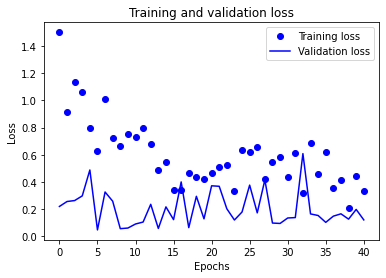

In [34]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(41)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

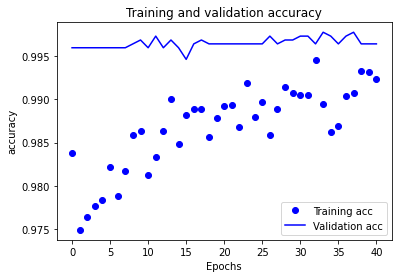

In [35]:
acc_values = history_dict['accuracy'] 
val_acc_values = history_dict['val_accuracy'] 
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy') 
plt.legend()
plt.show()